In [1]:

#pip install pandas_datareader
import os
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
from nsetools import Nse

from datetime import datetime, timedelta


# NSE

#### 1. Download list of all indexes and their codes 


In [2]:
from nsetools import Nse
nse = Nse()

In [3]:
all_indexes = nse.get_index_list()
#List of all indexes on NIFTY
all_indexes[0]

'NIFTY 50 Pre Open'

In [4]:
df = []
for i in all_indexes:
    df.append((i, nse.get_index_quote(i)))

In [5]:
df[1]

('NIFTY 50',
 {'name': 'NIFTY 50',
  'lastPrice': 11588.35,
  'change': 35.85,
  'pChange': 0.31,
  'imgFileName': 'NIFTY_50_open.png'})

In [6]:
df1 = pd.DataFrame.from_dict(dict(df))


In [7]:
df1.head()

,NIFTY 50 Pre Open,NIFTY 50,NIFTY NEXT 50,NIFTY100 LIQ 15,NIFTY BANK,INDIA VIX,NIFTY 100,NIFTY 500,NIFTY MIDCAP 100,NIFTY MIDCAP 50,...,NIFTY GS 10YR CLN,NIFTY GS 4 8YR,NIFTY GS 11 15YR,NIFTY GS 15YRPLUS,NIFTY GS COMPSITE,NIFTY MIDCAP 150,NIFTY SMLCAP 50,NIFTY SMLCAP 250,NIFTY MIDSML 400,NIFTY200 QUALTY30
change,None,35.85,112.65,-8.55,-155.50,0.02,37.8,11.4,-137.80,-45.35,...,3.51,4.87,5.34,3.98,6.04,-43.50,-21.30,-40.05,-42.35,23.9
imgFileName,None,NIFTY_50_open.png,NIFTY_NEXT_50_open.png,NIFTY100_LIQ_15_open.png,NIFTY_BANK_open.png,INDIA_VIX_open.png,NIFTY_100_open.png,NIFTY_500_open.png,NIFTY_MIDCAP_100_open.png,NIFTY_MIDCAP_50_open.png,...,NIFTY_GS_10YR_CLN_open.png,NIFTY_GS_4_8YR_open.png,NIFTY_GS_11_15YR_open.png,NIFTY_GS_15YRPLUS_open.png,NIFTY_GS_COMPSITE_open.png,NIFTY_MIDCAP_150_open.png,NIFTY_SMLCAP_50_open.png,NIFTY_SMLCAP_250_open.png,NIFTY_MIDSML_400_open.png,NIFTY200_QUALTY30_open.png
lastPrice,None,11588.4,27096.3,3844.7,30446,12.02,11692.6,9469.15,17008.5,4693.25,...,965.8,2094.17,2145.3,2344,2034.73,6118.3,2911.95,4975.8,5713,9256.6
name,None,NIFTY 50,NIFTY NEXT 50,NIFTY100 LIQ 15,NIFTY BANK,INDIA VIX,NIFTY 100,NIFTY 500,NIFTY MIDCAP 100,NIFTY MIDCAP 50,...,NIFTY GS 10YR CLN,NIFTY GS 4 8YR,NIFTY GS 11 15YR,NIFTY GS 15YRPLUS,NIFTY GS COMPSITE,NIFTY MIDCAP 150,NIFTY SMLCAP 50,NIFTY SMLCAP 250,NIFTY MIDSML 400,NIFTY200 QUALTY30
pChange,None,0.31,0.42,-0.22,-0.51,0.19,0.32,0.12,-0.80,-0.96,...,0.36,0.23,0.25,0.17,0.3,-0.71,-0.73,-0.80,-0.74,0.26


In [8]:
df1 = df1.transpose()

In [9]:
df1.head()

,change,imgFileName,lastPrice,name,pChange
NIFTY 50 Pre Open,None,None,None,None,None
NIFTY 50,35.85,NIFTY_50_open.png,11588.4,NIFTY 50,0.31
NIFTY NEXT 50,112.65,NIFTY_NEXT_50_open.png,27096.3,NIFTY NEXT 50,0.42
NIFTY100 LIQ 15,-8.55,NIFTY100_LIQ_15_open.png,3844.7,NIFTY100 LIQ 15,-0.22
NIFTY BANK,-155.50,NIFTY_BANK_open.png,30446,NIFTY BANK,-0.51


In [10]:
df1 = df1.reindex(['name', 'lastPrice', 'change', 'pChange', 'imgFileName' ], axis = 1)

In [11]:
df1.head()

,name,lastPrice,change,pChange,imgFileName
NIFTY 50 Pre Open,None,None,None,None,None
NIFTY 50,NIFTY 50,11588.4,35.85,0.31,NIFTY_50_open.png
NIFTY NEXT 50,NIFTY NEXT 50,27096.3,112.65,0.42,NIFTY_NEXT_50_open.png
NIFTY100 LIQ 15,NIFTY100 LIQ 15,3844.7,-8.55,-0.22,NIFTY100_LIQ_15_open.png
NIFTY BANK,NIFTY BANK,30446,-155.50,-0.51,NIFTY_BANK_open.png


1. Download list of all indexes and their codes
2. Download list of all stocks and their codes
3. Classify each index to its domain
4. Categorize each stock to its respective index
5. Downlaod historical data for each index and save to dataframe
6. Download historical data of each stock and save to dataframe

In [12]:
stock_codes = nse.get_stock_codes()

In [13]:
stock_codes

{'SYMBOL': 'NAME OF COMPANY',
 '20MICRONS': '20 Microns Limited',
 '21STCENMGM': '21st Century Management Services Limited',
 '3IINFOTECH': '3i Infotech Limited',
 '3MINDIA': '3M India Limited',
 '3PLAND': '3P Land Holdings Limited',
 '5PAISA': '5Paisa Capital Limited',
 '63MOONS': '63 moons technologies limited',
 '8KMILES': '8K Miles Software Services Limited',
 'A2ZINFRA': 'A2Z Infra Engineering Limited',
 'AARTIDRUGS': 'Aarti Drugs Limited',
 'AARTIIND': 'Aarti Industries Limited',
 'AARVEEDEN': 'Aarvee Denims & Exports Limited',
 'AAVAS': 'Aavas Financiers Limited',
 'ABAN': 'Aban Offshore Limited',
 'ABB': 'ABB India Limited',
 'ABBOTINDIA': 'Abbott India Limited',
 'ABCAPITAL': 'Aditya Birla Capital Limited',
 'ABFRL': 'Aditya Birla Fashion and Retail Limited',
 'ABMINTLTD': 'ABM International Limited',
 'ACC': 'ACC Limited',
 'ACCELYA': 'Accelya Solutions India Limited',
 'ACE': 'Action Construction Equipment Limited',
 'ADANIENT': 'Adani Enterprises Limited',
 'ADANIGAS': 'Ada

##### Stock Codes

In [14]:
columns = ['Symbol','Name_of_company']

In [15]:
a = pd.Series(stock_codes)

In [16]:
b = pd.DataFrame(columns=columns)
b['Symbol'] = stock_codes.keys()
b['Name_of_company'] = stock_codes.values()


In [17]:
print(len(stock_codes.keys()))
print(len(stock_codes.values()))

1636
1636


## NSEPY

###### Downloading historical data for all Stocks

In [18]:
sample_stocks = ['20MICRONS', '21STCENMGM', '3IINFOTECH']

In [19]:
stock_hist_cols = ['Symbol','Prev Close','Open',
                  'High','Low','Last','Close','VWAP',
                  'Volume','Turnover','Trades','Deliverable Volume',
                  '%Deliverble']


In [20]:
from datetime import date
from nsepy import get_history
start = date(2014,6,6)
end = date(2019,7,2)
stock_codes_data = []

for i in sample_stocks:
    stock_codes_data.append(get_history(i, start = start, end = end))
    stock_data_df = pd.concat(stock_codes_data)
#microns = pd.DataFrame(columns=stock_hist_cols)
#microns = get_history("20MICRONS", start = start, end = end)


In [21]:
stock_data_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2014-06-06,20MICRONS,EQ,37.55,38.00,39.5,36.70,37.30,37.20,38.16,123673,4.718900e+11,745,76461,0.6183
2014-06-09,20MICRONS,EQ,37.20,38.60,38.7,37.20,37.40,37.45,37.87,81596,3.090150e+11,527,15566,0.1908
2014-06-10,20MICRONS,EQ,37.45,37.90,38.0,36.35,36.75,36.75,37.40,117055,4.377693e+11,747,29133,0.2489
2014-06-11,20MICRONS,EQ,36.75,36.75,37.8,35.40,35.50,35.90,36.62,73931,2.707189e+11,398,41608,0.5628
2014-06-12,20MICRONS,EQ,35.90,35.90,37.8,34.40,36.35,36.10,35.88,105368,3.780686e+11,701,26187,0.2485


In [22]:
stock_data_df['Symbol'].value_counts()

20MICRONS     1251
3IINFOTECH    1200
21STCENMGM     301
Name: Symbol, dtype: int64

In [23]:

microns = pd.DataFrame(columns=stock_hist_cols)
microns = get_history("20MICRONS", start = start, end = end)

In [24]:
microns.head(50)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2014-06-06,20MICRONS,EQ,37.55,38.00,39.50,36.70,37.30,37.20,38.16,123673,4.718900e+11,745,76461,0.6183
2014-06-09,20MICRONS,EQ,37.20,38.60,38.70,37.20,37.40,37.45,37.87,81596,3.090150e+11,527,15566,0.1908
2014-06-10,20MICRONS,EQ,37.45,37.90,38.00,36.35,36.75,36.75,37.40,117055,4.377693e+11,747,29133,0.2489
2014-06-11,20MICRONS,EQ,36.75,36.75,37.80,35.40,35.50,35.90,36.62,73931,2.707189e+11,398,41608,0.5628
2014-06-12,20MICRONS,EQ,35.90,35.90,37.80,34.40,36.35,36.10,35.88,105368,3.780686e+11,701,26187,0.2485
2014-06-13,20MICRONS,EQ,36.10,35.15,36.45,34.25,34.40,34.50,35.41,81821,2.897034e+11,468,40876,0.4996
2014-06-16,20MICRONS,EQ,34.50,34.20,36.90,34.20,34.75,34.85,34.93,57837,2.020523e+11,571,7523,0.1301
2014-06-17,20MICRONS,EQ,34.85,34.45,35.60,34.10,35.00,35.00,34.92,81963,2.862346e+11,493,17911,0.2185
2014-06-18,20MICRONS,EQ,35.00,35.50,35.80,34.30,34.60,34.65,35.05,84917,2.976248e+11,445,17419,0.2051


#### Predicting Stock Price
1. Moving Average Method

In [25]:
microns['Date'] = microns.index

In [26]:
microns.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2014-06-06,20MICRONS,EQ,37.55,38.00,39.5,36.70,37.30,37.20,38.16,123673,4.718900e+11,745,76461,0.6183,2014-06-06
2014-06-09,20MICRONS,EQ,37.20,38.60,38.7,37.20,37.40,37.45,37.87,81596,3.090150e+11,527,15566,0.1908,2014-06-09
2014-06-10,20MICRONS,EQ,37.45,37.90,38.0,36.35,36.75,36.75,37.40,117055,4.377693e+11,747,29133,0.2489,2014-06-10
2014-06-11,20MICRONS,EQ,36.75,36.75,37.8,35.40,35.50,35.90,36.62,73931,2.707189e+11,398,41608,0.5628,2014-06-11
2014-06-12,20MICRONS,EQ,35.90,35.90,37.8,34.40,36.35,36.10,35.88,105368,3.780686e+11,701,26187,0.2485,2014-06-12


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))



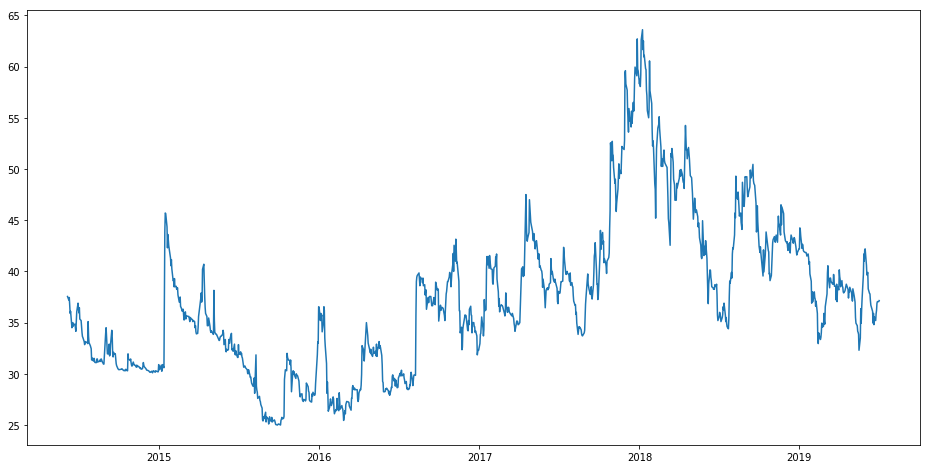

In [28]:
#plot
plt.figure(figsize=(16,8))
plt.plot(microns['Prev Close'], label='Close Price history')

In [29]:
#creating dataframe with date and the target variable
data = microns.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(microns)),columns=['Date', 'Prev Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data.index[i]
     new_data['Prev Close'][i] = data['Prev Close'][i]

In [30]:
microns.shape

(1251, 15)

In [31]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [32]:
new_data.shape, train.shape, valid.shape


((1251, 2), (987, 2), (264, 2))

In [33]:
from datetime import datetime
import time
from pandas import Timestamp


train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()



(datetime.date(2014, 6, 6),
 datetime.date(2018, 6, 5),
 datetime.date(2018, 6, 6),
 datetime.date(2019, 7, 2))

In [34]:
#make predictions
preds = []
for i in range(0,264):
    a = train['Prev Close'][len(train)-264+i:].sum() + sum(preds)
    b = a/264
    preds.append(b)

In [35]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Prev Close'])-preds),2)))
rms

8.900995863481274

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


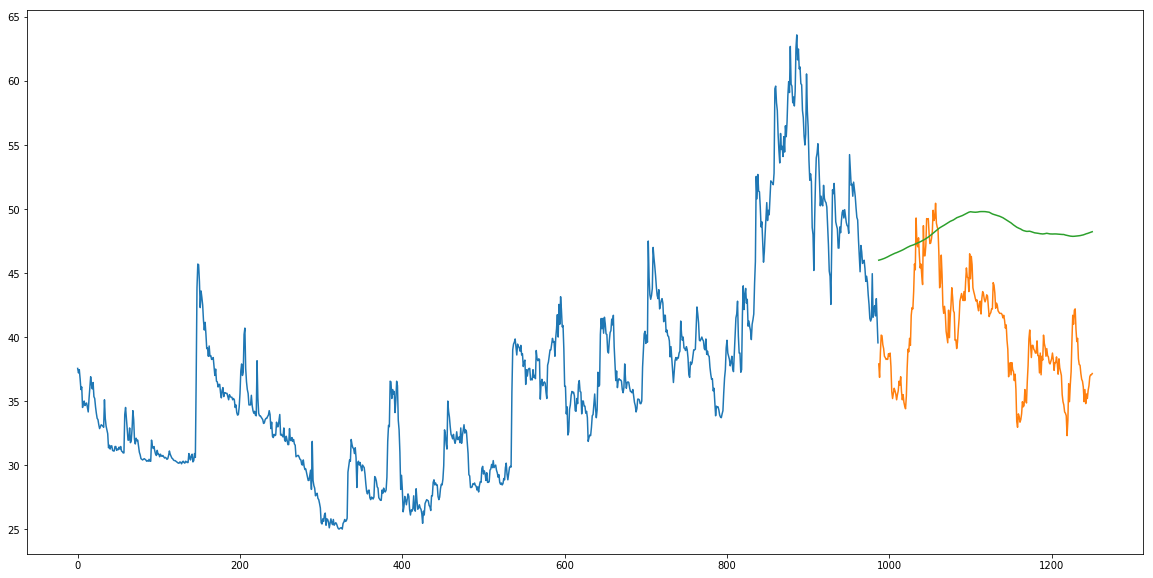

In [36]:

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Prev Close'])
plt.plot(valid[['Prev Close', 'Predictions']])

#### 2. Linear Regression

In [37]:
#setting index as date values
microns['Date'] = pd.to_datetime(microns.Date,format='%Y-%m-%d')
microns.index = microns['Date']

#sorting
data = microns.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(microns)),columns=['Date', 'Prev Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Prev Close'][i] = data['Prev Close'][i]

In [38]:
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [39]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Prev Close', axis=1)
y_train = train['Prev Close']
x_valid = valid.drop('Prev Close', axis=1)
y_valid = valid['Prev Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

9.585875403118047

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


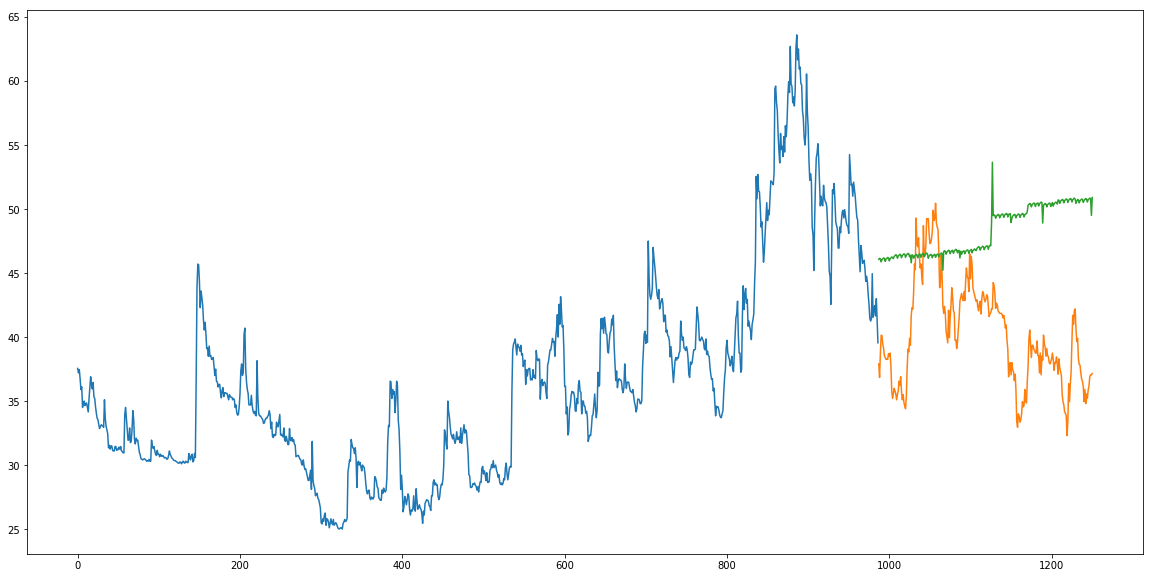

In [42]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Prev Close'])
plt.plot(valid[['Prev Close', 'Predictions']])

### KNN

In [43]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [60]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[i for i in range (2,10)]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
model.best_params_

{'n_neighbors': 9}

In [62]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

10.918779754751544

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


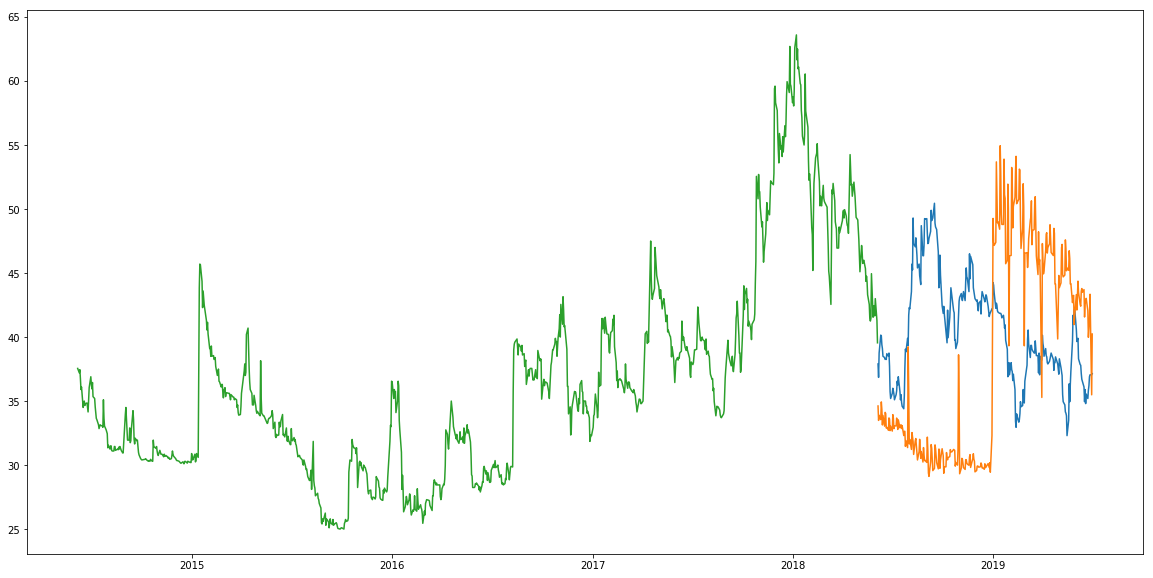

In [63]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Prev Close', 'Predictions']])
plt.plot(train['Prev Close'])




## Auto ARIMA

In [65]:
from pyramid.arima import auto_arima

data = microns.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Prev Close']
validation = valid['Prev Close']

model = auto_arima(training, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,start_P=0,
                   seasonal=True,d=1, D=1, trace=True,
                   error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=264)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3677.393, BIC=3687.156, Fit time=0.116 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3406.009, BIC=3425.535, Fit time=1.063 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3086.042, BIC=3105.567, Fit time=2.962 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3087.794, BIC=3112.202, Fit time=3.970 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3679.300, BIC=3693.944, Fit time=0.319 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3087.804, BIC=3112.211, Fit time=11.823 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3083.588, BIC=3112.877, Fit time=20.862 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2

In [66]:
#Results
rms=np.sqrt(np.mean(np.power((np.array(valid['Prev Close'])-np.array(forecast['Prediction'])),2)))
rms

4.583710949436735

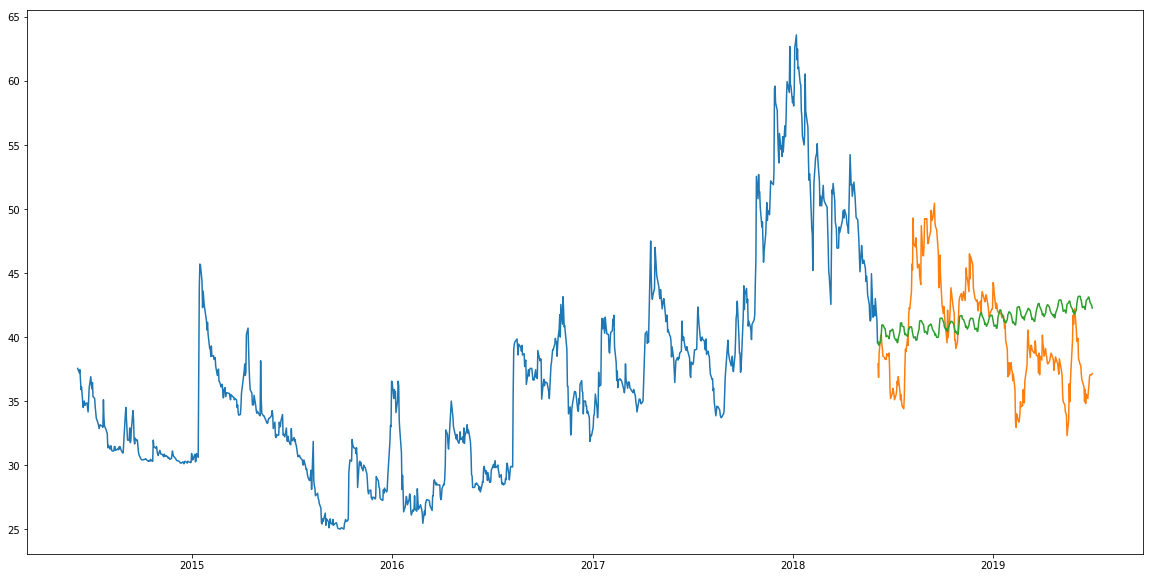

In [67]:
#plot
plt.plot(train['Prev Close'])
plt.plot(valid['Prev Close'])
plt.plot(forecast['Prediction'])

## LSTM

In [71]:
start = date(2014,7,3)
end = date(2018,7,4)
microns = pd.DataFrame(columns=stock_hist_cols)
microns = get_history("20MICRONS", start = start, end = end)

In [72]:
microns['Date'] = microns.index

In [73]:
print(microns.shape)
microns.head()

(989, 15)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2014-07-03,20MICRONS,EQ,36.45,36.90,36.90,35.20,35.35,35.35,36.02,14082,5.072680e+10,148,4096,0.2909,2014-07-03
2014-07-04,20MICRONS,EQ,35.35,35.30,35.80,35.00,35.00,35.20,35.36,77052,2.724470e+11,170,60879,0.7901,2014-07-04
2014-07-07,20MICRONS,EQ,35.20,36.25,36.50,34.10,34.50,34.55,34.97,105834,3.701432e+11,633,34291,0.3240,2014-07-07
2014-07-08,20MICRONS,EQ,34.55,35.25,35.25,34.05,34.05,34.05,34.35,75842,2.605174e+11,550,13998,0.1846,2014-07-08
2014-07-09,20MICRONS,EQ,34.05,33.90,34.70,33.00,33.70,33.65,33.75,90840,3.065455e+11,627,60591,0.6670,2014-07-09


In [74]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = microns.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(microns)),columns=['Date', 'Prev Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Prev Close'][i] = data['Prev Close'][i]

#setting index
new_data.index = data['Date']
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:600,:]
valid = dataset[600:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(120,len(train)):
    x_train.append(scaled_data[i-120:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

#predicting 413 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 120:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(120,inputs.shape[0]):
    X_test.append(inputs[i-120:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/5
 - 65s - loss: 0.0042
Epoch 2/5
 - 67s - loss: 0.0020
Epoch 3/5
 - 67s - loss: 0.0014
Epoch 4/5
 - 68s - loss: 0.0012
Epoch 5/5
 - 71s - loss: 0.0011


In [75]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

3.4464241502370156

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


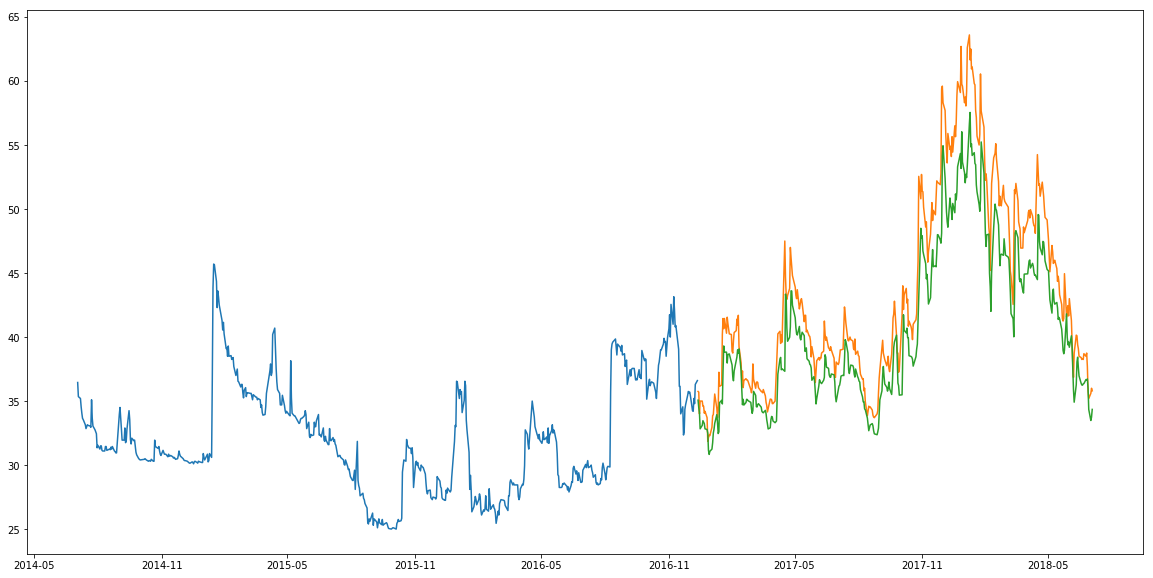

In [76]:
#for plotting
train = new_data[:600]
valid = new_data[600:]
valid['Predictions'] = closing_price
plt.plot(train['Prev Close'])
plt.plot(valid[['Prev Close','Predictions']])

In [79]:
start = date(2018,7,3)
end = date(2019,7,4)
microns_test = pd.DataFrame(columns=stock_hist_cols)
microns_test_df = get_history("20MICRONS", start = start, end = end)

In [ ]:
#microns_test_df['Date'] = microns_test_df.index

In [80]:
print(microns_test_df.shape)
microns_test_df.head()

(247, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-07-03,20MICRONS,EQ,36.00,35.50,37.00,35.50,35.85,35.80,35.99,29266,1.053361e+11,396,14130,0.4828
2018-07-04,20MICRONS,EQ,35.80,36.85,36.85,34.95,35.40,35.55,35.47,23427,8.310220e+10,328,12824,0.5474
2018-07-05,20MICRONS,EQ,35.55,35.45,36.20,35.00,35.10,35.10,35.45,27984,9.921508e+10,478,13583,0.4854
2018-07-06,20MICRONS,EQ,35.10,35.05,36.10,34.80,35.50,35.50,35.66,23174,8.262821e+10,370,12500,0.5394
2018-07-09,20MICRONS,EQ,35.50,36.00,36.70,35.60,36.00,35.80,36.17,21189,7.664870e+10,312,10897,0.5143


In [81]:
microns_test_df.drop(['Symbol', 'Series', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
                     'Turnover', 'Trades', 'Deliverable Volume','%Deliverble'], axis = 1, inplace = True)

In [82]:
#creating dataframe
#data_test = microns.sort_index(ascending=True, axis=0)
#new_data_test = pd.DataFrame(index=range(0,len(microns)),columns=['Date', 'Prev Close'])
#for i in range(0,len(data)):
#    new_data['Date'][i] = data['Date'][i]
#    new_data['Prev Close'][i] = data['Prev Close'][i]

#setting index
#new_data.index = data['Date']
#new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = microns_test_df.values

#train = dataset[0:1100,:]
valid = dataset

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

#x_train, y_train = [], []
#for i in range(60,len(train)):
#    x_train.append(scaled_data[i-60:i,0])
#    y_train.append(scaled_data[i,0])
#x_train, y_train = np.array(x_train), np.array(y_train)

#x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
#model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#model.add(LSTM(units=50))
#model.add(Dense(1))

#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

#predicting 413 values, using past 60 from the train data
inputs = microns_test_df.values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(120,inputs.shape[0]):
    X_test.append(inputs[i:i,0])
X_test = np.array(inputs)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

ValueError: Error when checking input: expected lstm_1_input to have shape (120, 1) but got array with shape (1, 1)

In [ ]:
closing_price.shape

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
valid

In [ ]:
#for plotting
train = new_data
valid = microns_test_df
valid['Predictions'] = closing_price
#
plt.plot(new_data['Prev Close'])
plt.plot(valid[['Prev Close','Predictions']])

###### Getting list of Blue Chip Stocks

In [89]:
BlueChip_stocks = pd.read_csv("Data/Nifty50_Bluechip.csv")

In [91]:
BlueChip_stocks_list = Blue_chip_stocks['Symbol']

In [92]:
BlueChip_stocks_list

0     ADANIPORTS
1     ASIANPAINT
2       AXISBANK
3     BAJAJ-AUTO
4     BAJFINANCE
5     BAJAJFINSV
6           BPCL
7     BHARTIARTL
8       INFRATEL
9      BRITANNIA
10         CIPLA
11     COALINDIA
12       DRREDDY
13     EICHERMOT
14          GAIL
15        GRASIM
16       HCLTECH
17      HDFCBANK
18    HEROMOTOCO
19      HINDALCO
20    HINDUNILVR
21          HDFC
22     ICICIBANK
23           ITC
24    IBULHSGFIN
25           IOC
26    INDUSINDBK
27          INFY
28      JSWSTEEL
29     KOTAKBANK
30            LT
31           M&M
32        MARUTI
33          NTPC
34          ONGC
35     POWERGRID
36      RELIANCE
37          SBIN
38     SUNPHARMA
39           TCS
40    TATAMOTORS
41     TATASTEEL
42         TECHM
43         TITAN
44           UPL
45    ULTRACEMCO
46          VEDL
47         WIPRO
48       YESBANK
49          ZEEL
Name: Symbol, dtype: object

In [94]:
from datetime import date
from nsepy import get_history
start = date(2014,6,6)
end = date(2019,7,2)
stock_codes_data = []

for i in BlueChip_stocks_list:
    stock_codes_data.append(get_history(i, start = start, end = end))
    stock_data_df = pd.concat(stock_codes_data)
#microns = pd.DataFrame(columns=stock_hist_cols)
#microns = get_history("20MICRONS", start = start, end = end)


In [98]:
print(stock_data_df.shape)
stock_data_df

(62550, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2014-06-06,ADANIPORTS,EQ,241.65,243.85,260.40,242.00,256.30,257.65,251.21,8606900,2.162124e+14,91331,4577090,0.5318
2014-06-09,ADANIPORTS,EQ,257.65,259.00,261.80,252.30,253.50,254.00,255.94,4765315,1.219655e+14,67560,1945616,0.4083
2014-06-10,ADANIPORTS,EQ,254.00,255.70,255.70,242.70,246.50,246.05,246.15,5125196,1.261590e+14,63946,2660050,0.5190
2014-06-11,ADANIPORTS,EQ,246.05,247.40,251.00,235.50,236.30,238.20,243.00,6632454,1.611711e+14,77537,2948800,0.4446
2014-06-12,ADANIPORTS,EQ,238.20,239.00,242.10,233.10,237.50,236.95,238.17,2751243,6.552627e+13,36354,986428,0.3585
2014-06-13,ADANIPORTS,EQ,236.95,237.95,246.55,223.55,231.60,230.60,235.20,5345562,1.257267e+14,53941,1825747,0.3415
2014-06-16,ADANIPORTS,EQ,230.60,229.95,230.00,219.65,228.80,228.10,225.60,3233252,7.294310e+13,54379,1194280,0.3694
2014-06-17,ADANIPORTS,EQ,228.10,227.90,236.60,226.40,236.40,236.10,233.03,3338397,7.779314e+13,60968,1371748,0.4109
2014-06-18,ADANIPORTS,EQ,236.10,235.00,239.30,228.85,230.00,231.05,234.67,2415067,5.667495e+13,29606,632816,0.2620


In [155]:
stock_data_df.to_csv("C:\\Users\\Bharath Ambati\\Desktop\\INSOFE\\Internship\\Data")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Bharath Ambati\\Desktop\\INSOFE\\Internship\\Data'

In [135]:
import datetime
#getting today's date
todays_date = datetime.datetime.now().date()
#Creating date range
index = pd.date_range(start="2019-07-03", end=todays_date)
#Creating test dataframe with dates as index
test_data = pd.DataFrame(index=index)

In [141]:
Blue_chip_stocks.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


##### Splitting data into Train and Val

In [145]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]
df_ = stock_data_df
df_new = {}
for i in stock_data_df:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2015", "Prev Close")

IndexingError: Too many indexers

In [ ]:
# First, we get the data
stockList = BlueChip_stocks_list
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("../input/" + i + "_2006-01-01_to_2018-01-01.csv", index_col="Date", parse_dates=["Date"])

In [146]:
for i in stock_data_df_data:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

NameError: name 'stock_data_df_data' is not defined

In [ ]:
Blue